<a href="https://colab.research.google.com/github/toniname/Gist/blob/main/pytonlesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Отримання даних*

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Харків")
data_json = response.json()

Створення **DataFrame**

In [ ]:
df = pd.DataFrame(data_json["data"])

In [ ]:
df.head()

,at,val
0,2022-08-29,784
1,2022-08-30,802
2,2022-08-31,834
3,2022-09-01,828
4,2022-09-02,829


In [ ]:
df.shape

(289, 2)

In [ ]:
df.columns

Index(['at', 'val'], dtype='object')

In [ ]:
df.dtypes

at     object
val     int64
dtype: object

Підготовка даних

In [ ]:
df["at"] = pd.to_datetime(df["at"])

In [ ]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns = {"at": "Дата", "val": "Вакансії"})

In [ ]:
df.head()

,Дата,Вакансії
0,2022-08-29,784
1,2022-08-30,802
2,2022-08-31,834
3,2022-09-01,828
4,2022-09-02,829


In [ ]:
df.set_index('Дата', inplace=True)

Побудова графіків

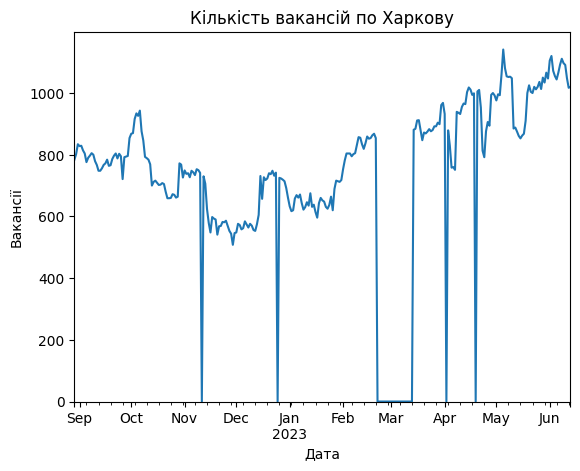

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Харкову")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df["Вакансії"] = df['Вакансії'].replace(0, np.nan)
df['Вакансії'] = df["Вакансії"].interpolate()

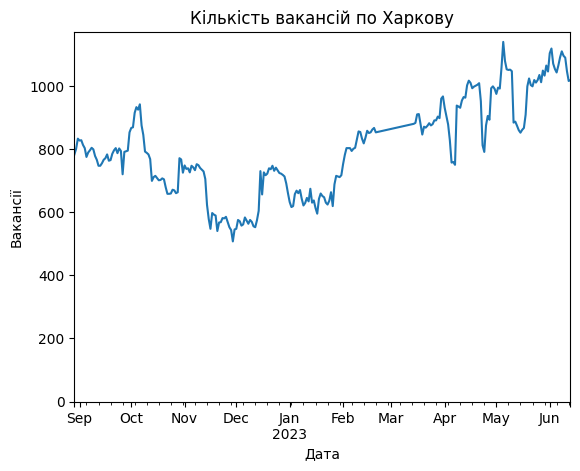

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Харкову")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:

df['rolling mean'] = df['Вакансії'].rolling(window=7).mean()

In [ ]:
df

,Вакансії,rolling mean
Дата,,
2022-08-29,784.0,NaN
2022-08-30,802.0,NaN
2022-08-31,834.0,NaN
2022-09-01,828.0,NaN
2022-09-02,829.0,NaN
...,...,...
2023-06-09,1097.0,1076.714286
2023-06-10,1091.0,1079.428571
2023-06-11,1048.0,1078.428571


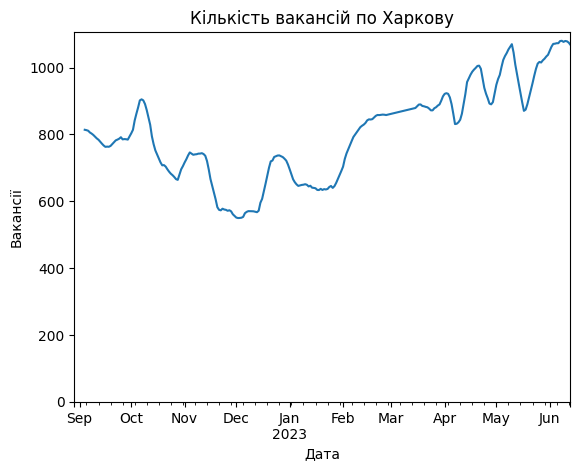

In [ ]:
df["rolling mean"].plot()
plt.title("Кількість вакансій по Харкову")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df.describe()

,Вакансії,rolling mean
count,289.000000,283.000000
mean,804.799308,802.184755
std,146.413324,141.456787
min,508.000000,549.285714
25%,705.000000,692.750000
50%,800.000000,802.142857
75%,885.000000,889.785714
max,1141.000000,1080.000000


Друга частина

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Одеса")
data_json = response.json()

In [ ]:
df_odesa = pd.DataFrame(data_json['data'])

In [ ]:
df_odesa.head

<bound method NDFrame.head of              at   val
0    2022-05-23   808
1    2022-05-24   788
2    2022-05-25   808
3    2022-05-26   877
4    2022-05-27   904
..          ...   ...
382  2023-06-09  1740
383  2023-06-10  1740
384  2023-06-11  1685
385  2023-06-12  1660
386  2023-06-13  1678

[387 rows x 2 columns]>

In [ ]:
df_odesa["at"] = pd.to_datetime(df_odesa["at"])

In [ ]:
df_odesa = df_odesa.rename(columns = {"at": "Дата", "val": "Вакансії"})

In [ ]:
df_odesa.set_index('Дата', inplace=True)
df_odesa["Вакансії"] = df_odesa['Вакансії'].replace(0, np.nan)
df_odesa['Вакансії'] = df_odesa["Вакансії"].interpolate()
df_odesa['rolling mean'] = df_odesa['Вакансії'].rolling(window=7).mean()

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json = response.json()

In [ ]:
df_Lviv = pd.DataFrame(data_json['data'])

In [ ]:
df_Lviv.head()

,at,val
0,2022-05-23,1759
1,2022-05-24,1763
2,2022-05-25,1790
3,2022-05-26,1806
4,2022-05-27,1833


In [ ]:
df_Lviv["at"] = pd.to_datetime(df_Lviv["at"])
df_Lviv = df_Lviv.rename(columns = {"at": "Дата", "val": "Вакансії"})
df_Lviv.set_index('Дата', inplace=True)
df_Lviv["Вакансії"] = df_Lviv['Вакансії'].replace(0, np.nan)
df_Lviv['Вакансії'] = df_Lviv["Вакансії"].interpolate()
df_Lviv['rolling mean'] = df_Lviv['Вакансії'].rolling(window=7).mean()

In [ ]:
df_Lviv

,Вакансії,rolling mean
Дата,,
2022-05-23,1759.0,NaN
2022-05-24,1763.0,NaN
2022-05-25,1790.0,NaN
2022-05-26,1806.0,NaN
2022-05-27,1833.0,NaN
...,...,...
2023-06-09,1597.0,1538.714286
2023-06-10,1599.0,1543.714286
2023-06-11,1536.0,1545.571429


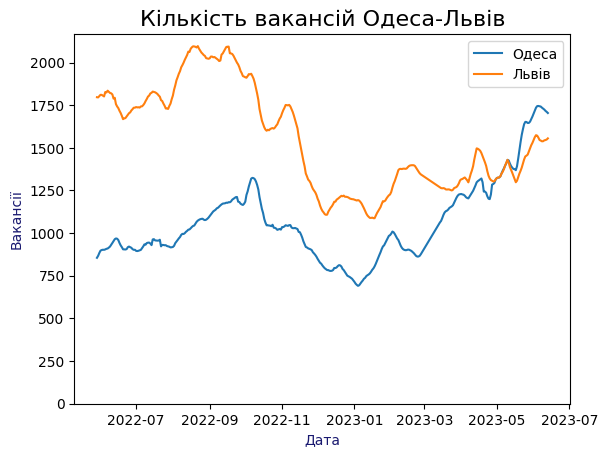

In [ ]:
fig, axs = plt.subplots()
axs.plot(df_odesa.index, df_odesa['rolling mean'], label="Одеса")
axs.plot(df_Lviv.index, df_Lviv['rolling mean'], label="Львів")

plt.title("Кількість вакансій Одеса-Львів", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії', color='midnightblue')
plt.ylim(bottom=0)
plt.legend()
plt.show()